In [25]:
import os
import numpy as np
import pandas as pd
import rosbag
import matplotlib.pyplot as plt
path_noise="auto_sending_goals/1/auto_sending_goals_2021-06-18-13-58-55.bag"
path_no_noise="auto_sending_goals/11/auto_sending_goals_2021-06-18-14-25-41.bag"


In [45]:
bag_noise=rosbag.Bag(path_noise)
bag_no_noise=rosbag.Bag(path_no_noise)
for topic,msg,t in bag_noise.read_messages(topics='/odom'):
    print(msg)

.07117584223967913
      y: 1.792918897477666e-06
      z: 0.0
    angular: 
      x: 0.0
      y: 0.0
      z: 0.035507332237945166
  covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
header: 
  seq: 4307
  stamp: 
    secs: 143
    nsecs: 670000000
  frame_id: "odom"
child_frame_id: "base_footprint"
pose: 
  pose: 
    position: 
      x: -0.051993819016983224
      y: -2.2234828873020387
      z: -0.0010018629939715605
    orientation: 
      x: 5.058966199457861e-05
      y: 0.0038574893274519705
      z: -0.01636988632444537
      w: 0.9998585620168984
  covariance: [1e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1000000000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1000000000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1000000000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001]
twist: 
  twist: 
    linear: 
      x: 0.05283324808628

In [39]:
df_noise=pd.DataFrame(columns=['position_x','position_y','position_z','orientation_x','orientation_y','orientation_z','orientation_w'])
for topic,msg,t in bag_noise.read_messages(topics='/odom'):
    df_noise.loc[t.to_sec()]=[msg.pose.pose.position.x,msg.pose.pose.position.y,msg.pose.pose.position.z,msg.pose.pose.orientation.x,msg.pose.pose.orientation.y,msg.pose.pose.orientation.z,msg.pose.pose.orientation.w]

In [40]:
df_no_noise=pd.DataFrame(columns=['position_x','position_y','position_z','orientation_x','orientation_y','orientation_z','orientation_w'])
for topic,msg,t in bag_no_noise.read_messages(topics='/odom'):
    df_no_noise.loc[t.to_sec()]=[msg.pose.pose.position.x,msg.pose.pose.position.y,msg.pose.pose.position.z,msg.pose.pose.orientation.x,msg.pose.pose.orientation.y,msg.pose.pose.orientation.z,msg.pose.pose.orientation.w]

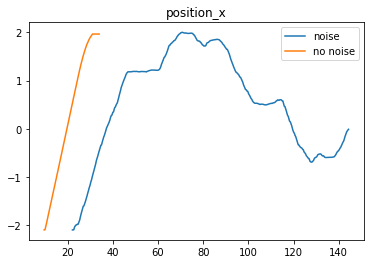

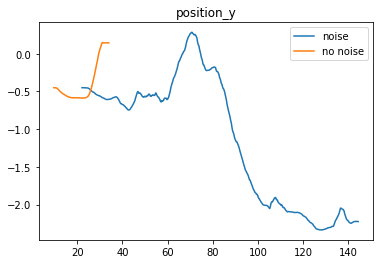

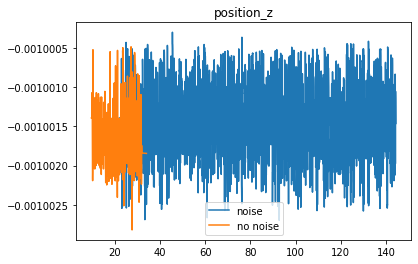

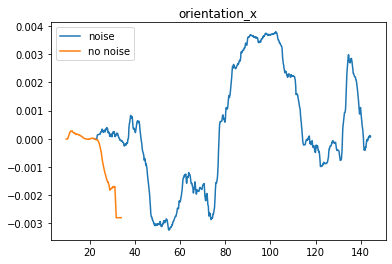

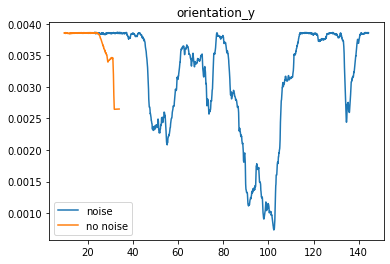

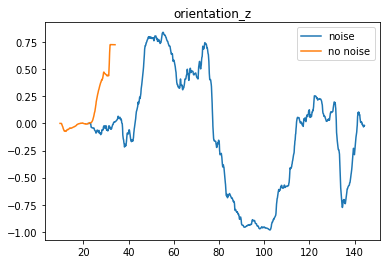

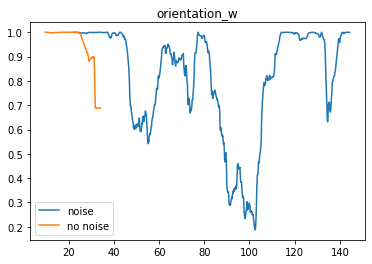

In [44]:
for col in df_noise.columns:
    plt.figure()
    plt.plot(df_noise.index,df_noise[col],label='noise')
    plt.plot(df_no_noise.index,df_no_noise[col],label='no noise')
    plt.legend()
    plt.title(col)
    plt.savefig(col+".png")
    plt.show()

In [42]:
df_noise

,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,orientation_w
22.139,-2.100021,-0.449987,-0.001001,-0.000007,0.003853,0.000096,0.999993
22.171,-2.100021,-0.449987,-0.001001,-0.000007,0.003853,0.000097,0.999993
22.205,-2.100021,-0.449987,-0.001001,-0.000007,0.003853,0.000097,0.999993
22.238,-2.100021,-0.449987,-0.001001,-0.000007,0.003853,0.000097,0.999993
22.271,-2.100021,-0.449987,-0.001001,-0.000007,0.003853,0.000097,0.999993
...,...,...,...,...,...,...,...
144.184,-0.018441,-2.225204,-0.001002,0.000083,0.003860,-0.022725,0.999734
144.205,-0.017358,-2.225251,-0.001001,0.000070,0.003849,-0.020417,0.999784
144.247,-0.015602,-2.225321,-0.001001,0.000067,0.003847,-0.019879,0.999795
144.287,-0.013091,-2.225422,-0.001001,0.000069,0.003848,-0.020624,0.999780
